In [1]:
from yuning_util.dev_mode import DevMode
pkg_dev = DevMode(pkg='k-seq')
pkg_dev.on()

from importlib import reload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

from k_seq.data import count_file, seq_table, seq_table_vis, transform
from k_seq.utility import func_tools
# reload(count_file)
# reload(seq_table)
reload(func_tools)
reload(seq_table_vis)
reload(seq_table)
reload(transform)

<module 'k_seq.data.transform' from '/home/yuning/.pyenv/versions/anaconda3-5.0.1/envs/k-seq/lib/python3.7/site-packages/k_seq/data/transform.py'>

In [3]:
cls = seq_table.SeqTable

COUNT_FILE = '/mnt/storage/projects/k-seq/input/byo_counts/'

byo_selected = cls.from_count_files(
    file_root=COUNT_FILE,
    pattern_filter='counts-',
    name_pattern='counts-[{byo}{exp_rep}].txt',
    dry_run=False,
    sort_by='name',
    x_values=np.concatenate((
        np.repeat([250, 50, 10, 2], repeats=6) * 1e-6,
        np.array([np.nan])), axis=0
    ),
    x_unit='mol',
    input_sample_name=['R0']
)

byo_selected.add_spike_in(
    spike_in_seq='AAAAACAAAAACAAAAACAAA',
    spike_in_amount=np.repeat([1, 0.4, 0.3, 0.1], repeats=6),
    radius=4,
    dna_unit='ng',
    black_list=['R0']
)

byo_selected.add_total_dna_amount(dna_amount={'R0': 2000}, dna_unit='ng')

TypeError: 'NoneType' object is not iterable

In [28]:
byo_selected.to_pickle('/mnt/storage/projects/k-seq/datasets/byo_selected.pkl')

In [4]:
from k_seq.utility import file_tools
byo_selected = file_tools.read_pickle('/mnt/storage/projects/k-seq/datasets/byo_selected.pkl')

In [3]:
byo_selected.table_smpl_filtered_seq_filtered

NameError: name 'byo_selected' is not defined

In [6]:
byo_selected.grouper.reacted

Group: ['1A', '1B', '1C', '1D', '1E', '1F', '2A', '2B', '2C', '2D', '2E', '2F', '3A', '3B', '3C', '3D', '3E', '3F', '4A', '4B', '4C', '4D', '4E', '4F']

In [13]:
from k_seq.data import filters

reload(filters)

failed_sample_remover = filters.SampleFilter(target=byo_selected,
                                             sample_to_remove=['2C', '2D', '2E', '2F',
                                                               '3D', '3E', '3F',
                                                               '4D', '4F'])

In [17]:
byo_selected.table_smpl_filtered = failed_sample_remover.get_filtered_table(remove_zero=True)

In [21]:
byo_selected.

,1A,1B,1C,1D,1E,1F,2A,2B,2C,2D,...,3D,3E,3F,4A,4B,4C,4D,4E,4F,R0
GGGGGGGGATTCATGACTATT,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GGGGGGGAGTAGGACTGCAAA,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GGGGGGGAAGACTCCGGAACG,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GGGGGGGAACGCATTTCACGG,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GGGGGGGACGTTCACCGGCAA,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCCCCCCACGGAGCGAATG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CCCCCCCCTGGTCAGGTCGCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CCCCCCCCTGCCTGGTCTGAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CCCCCCCCTCGAGTCTGCGCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
spike_in_filter = filters.SpikeInFilter(target=byo_selected)  # remove spike-in seqs
seq_length_filter = filters.SeqLengthFilter(target=byo_selected, min_len=21, max_len=21) # remove non-21 nt seq

byo_selected.table_seq_filtered = seq_length_filter.get_filtered_table(
    target=spike_in_filter.get_filtered_table(target=byo_selected)
)

In [27]:
byo_selected.table_smpl_filtered_seq_filtered = failed_sample_remover.get_filtered_table(
    target=byo_selected.table_seq_filtered,
    remove_zero=True
)

In [ ]:
byo_selected.table_smpl_filtered_seq_filtered

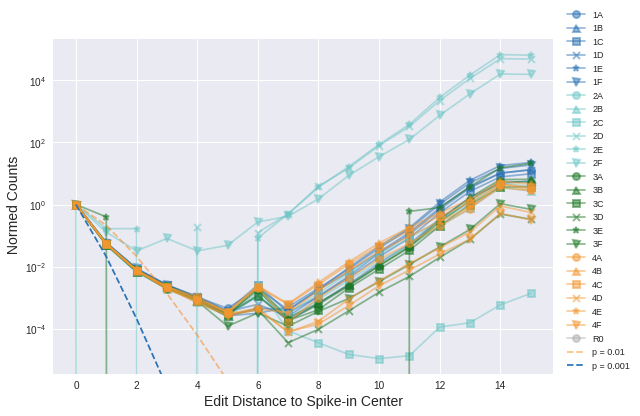

In [20]:
marker_map = {'0': 'o', 'A': 'o', 'B': '^', 'C': 's', 'D': 'x', 'E': '*', 'F': 'v'}
color_map = {'R': '#AEAEAE', '1': '#2C73B4', '2': '#70C7C7',
             '3': '#1C7725', '4':'#F39730'}

transform.spike_in_peak_plot(
    spike_in=spike_in,
    marker_list=[marker_map[sample[-1]] for sample in byo_selected.sample_list.values],
    color_list=[color_map[sample[0]] for sample in byo_selected.sample_list.values],
    err_guild_lines=[1e-2, 1e-3],
    figsize=[9, 6],
    legend_col=1,
    #save_fig_to='/mnt/storage/projects/k-seq/output/2019-11-21_RU_figs/spike-in_peak.pdf'
)
plt.show()

In [ ]:
from k_seq.data import filters
reload(filters)

sample_filter = filters.SampleFilter(target=byo_selected.table, sample_to_remove=[])

In [ ]:
from_count_file = True
count_file_path=None
doped_norm_path=None
pickled_path=None

def _load_byo_doped(cls, from_count_file=False, count_file_path=None, doped_norm_path=None, pickled_path=None):
    pass

cls = seq_table.SeqTable

"""todo: add dataset description"""
# PICKLE_PATH = '/mnt/storage/projects/k-seq/datasets/byo_doped.pkl' if pickled_path is None else pickled_path


COUNT_FILE = '/mnt/storage/projects/k-seq/input/byo_counts/' if count_file_path is None \
    else count_file_path

if from_count_file:
    import numpy as np
    import pandas as pd

    print('Generate SeqTable instance for BYO-selection pool...')
    print(f'Importing from {COUNT_FILE}...this could take a couple of minutes...')
    
    # read count files


    byo_selected = cls.from_count_files(
        file_root=COUNT_FILE,
        pattern_filter='counts-',
        name_pattern='counts-d-[{byo}{exp_rep}].txt',
        dry_run=False,
        sort_by='name',
        x_values=np.concatenate((
            np.repeat([1250, 250, 50, 10, 2], repeats=3) * 1e-6,
            np.array([np.nan])), axis=0
        ),
        x_unit='mol',
        spike_in_seq='AAAAACAAAAACAAAAACAAA',
        spike_in_amount=np.concatenate((
            np.repeat([2, 2, 1, 0.2, .04], repeats=3),
            np.array([10])), axis=0    # input pool sequenced is 3-times of actual initial pool
        ),
        radius=4,
        dna_unit='ng',
        dna_amount=dna_amount,
        input_sample_name=['R0']
    )

    # Add standard filters
    from . import filters
    spike_in_filter = filters.SpikeInFilter(target=byo_doped)  # remove spike-in seqs
    seq_length_filter = filters.SeqLengthFilter(target=byo_doped, min_len=21, max_len=21) # remove non-21 nt seq
    # singleton_filter = filters.SingletonFilter(target=byo_doped)  # we keep even singletons

    # filtered table by removing spike-in within 4 edit distance and seqs not with 21 nt
    byo_doped.table_filtered = seq_length_filter.get_filtered_table(
            target=spike_in_filter.get_filtered_table()
    )

    # Add replicates grouper
    byo_doped.grouper.add({'byo': {
        1250: ['A1', 'A2', 'A3'],
        250: ['B1', 'B2', 'B3'],
        50: ['C1', 'C2', 'C3'],
        10: ['D1', 'D2', 'D3'],
        2: ['E1', 'E2', 'E3']
    }}, target=byo_doped.table_filtered)

    # normalized using spike-in
    byo_doped.table_filtered_abs_amnt_spike_in = byo_doped.spike_in.apply(target=byo_doped.table_filtered)

    # normalized using total dna amount
    byo_doped.table_filtered_abs_amnt_total_dna = byo_doped.dna_amount.apply(target=byo_doped.table_filtered)

    # calculate reacted faction, remove seqs are not in input pools
    from .transform import ReactedFractionNormalizer
    reacted_frac = ReactedFractionNormalizer(input_samples=['R0'],
                                             reduce_method='median',
                                             remove_zero=True)
    byo_doped.table_filtered_reacted_frac_spike_in = reacted_frac.apply(
        target=byo_doped.table_filtered_abs_amnt_spike_in
    )

    byo_doped.table_filtered_reacted_frac_total_dna = reacted_frac.apply(
        target=byo_doped.table_filtered_abs_amnt_total_dna
    )
    # further filter out sequences that are not detected in all samples
    min_detected_times_filter = filters.DetectedTimesFilter(
        target=byo_doped.table_filtered_reacted_frac_spike_in,
        min_detected_times=byo_doped.table_filtered_reacted_frac_spike_in.shape[1]
    )
    byo_doped.table_in_all_samples = min_detected_times_filter.get_filtered_table()
    print('Finished!')
else:
    print(f'Load BYO-doped pool data from pickled record from {BYO_DOPED_PKL}')
    import pickle
    from ..utility.file_tools import read_pickle
    byo_doped = read_pickle(BYO_DOPED_PKL)
    print('Imported!')

return byo_doped

In [ ]:
byo_selected = cls.from_count_files(
        file_root=COUNT_FILE,
        pattern_filter='counts-',
        name_pattern='counts-d-[{byo}{exp_rep}].txt',
        dry_run=False,
        sort_by='name',
        x_values=np.concatenate((
            np.repeat([1250, 250, 50, 10, 2], repeats=3) * 1e-6,
            np.array([np.nan])), axis=0
        ),
        x_unit='mol',
        spike_in_seq='AAAAACAAAAACAAAAACAAA',
        spike_in_amount=np.concatenate((
            np.repeat([2, 2, 1, 0.2, .04], repeats=3),
            np.array([10])), axis=0    # input pool sequenced is 3-times of actual initial pool
        ),
        radius=4,
        dna_unit='ng',
        dna_amount=dna_amount,
        input_sample_name=['R0']
    )

# Load dopped pool count file and convert to `SeqTable`

In [3]:
byo_doped = seq_table.SeqTable.load_default_dataset(dataset='byo_doped')

Load BYO-doped pool data from pickled record from /mnt/storage/projects/k-seq/datasets/byo_doped.pkl
Imported!


# Sample overview characterization

In [8]:
black_list = []
byo_selected.sample_overview()

,name,sample type,x value,unique seqs,total counts,"dna amount (from spike-in, ng)",spike-in rad,spike-in pct,"dna amount (from total dna, ng)"
1A,1A,reacted,0.000250,981824,10096876,43.856939,4,2.280141e-02,NaN
1B,1B,reacted,0.000250,1277473,13960513,20.665770,4,4.838920e-02,NaN
1C,1C,reacted,0.000250,634623,6732482,33.457483,4,2.988868e-02,NaN
1D,1D,reacted,0.000250,264277,2660135,44.562107,4,2.244059e-02,NaN
1E,1E,reacted,0.000250,420899,4587345,77.312632,4,1.293450e-02,NaN
1F,1F,reacted,0.000250,278471,2790357,62.730026,4,1.594133e-02,NaN
2A,2A,reacted,0.000050,1176010,5191889,7.090565,4,5.641299e-02,NaN
2B,2B,reacted,0.000050,1063489,5964196,5.220326,4,7.662357e-02,NaN
2C,2C,reacted,0.000050,8568,4877642,0.402516,4,9.937505e-01,NaN
2D,2D,reacted,0.000050,241315,3201172,67393.094737,4,5.935326e-06,NaN


In [9]:
dna_amount = byo_selected.sample_overview()[['dna amount (from spike-in, ng)', 'dna amount (from total dna, ng)']]

Text(0, 0.5, 'Std. Dev. of DNA amount')

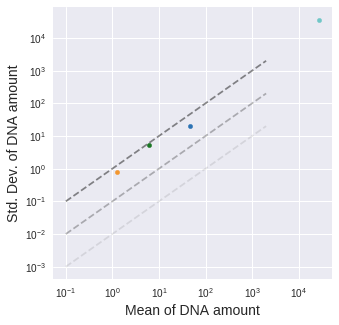

In [12]:
# save_fig_to = '/mnt/storage/projects/k-seq/output/2019-11-21_RU_figs/total_dna_amount_dev.pdf'
color_map = {'R': '#AEAEAE', '1': '#2C73B4', '2': '#70C7C7',
             '3': '#1C7725', '4':'#F39730', '5': '#B2112A'}

fig, ax = plt.subplots(1,1, figsize=(5, 5))
for byo, color in color_map.items():
    samples = [sample for sample in dna_amount.index if sample[0] == byo]
    ax.scatter(dna_amount.loc[samples, 'dna amount (from spike-in, ng)'].mean(),
               dna_amount.loc[samples, 'dna amount (from spike-in, ng)'].std(), marker='o', s=20, color=color, label=byo)
    ax.scatter(dna_amount.loc[samples, 'dna amount (from total dna, ng)'].mean(),
               dna_amount.loc[samples, 'dna amount (from total dna, ng)'].std(), marker='x', s=20, color=color)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([0.1, 2000])
ax.set_ylim([0.1, 2000])
ax.legend()

xs = np.logspace(np.log10(0.1), np.log10(2000), 20)
ax.plot(xs, xs, '#151515', alpha=0.5, ls='--', zorder=1)
ax.plot(xs, xs * 0.1, '#151515', alpha=0.3, ls='--', zorder=1)
ax.plot(xs, xs * 0.01, '#151515', alpha=0.1, ls='--', zorder=1)
ax.set_xlabel('Mean of DNA amount (ng)', fontsize=14)
ax.set_ylabel('Std. Dev. of DNA amount (ng)', fontsize=14)

# if save_fig_to:
#     fig.patch.set_alpha(0)
#     fig.savefig(save_fig_to, bbox_inches='tight', dpi=300)

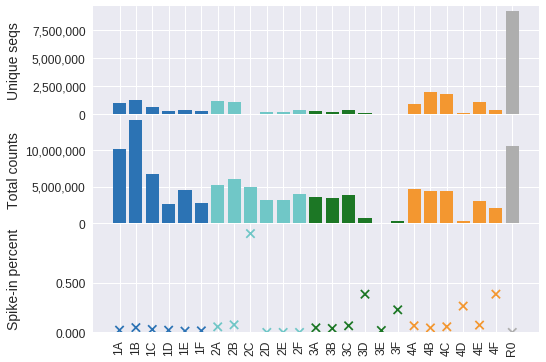

In [10]:
marker_map = {'0': 'o', 'A': 'o', 'B': '^', 'C': 's', 'D': 'x', 'E': '*', 'F': 'v'}
color_map = {'R': '#AEAEAE', '1': '#2C73B4', '2': '#70C7C7',
             '3': '#1C7725', '4':'#F39730'}
seq_table_vis.sample_overview_plots(
    seq_table=byo_selected,
    color_map={sample: color_map[sample[0]] for sample in byo_selected.sample_list},
    figsize=[8, 6],
    save_fig_to='/mnt/storage/projects/k-seq/output/2019-11-21_RU_figs/selected_pool_sample_overview.pdf'
)

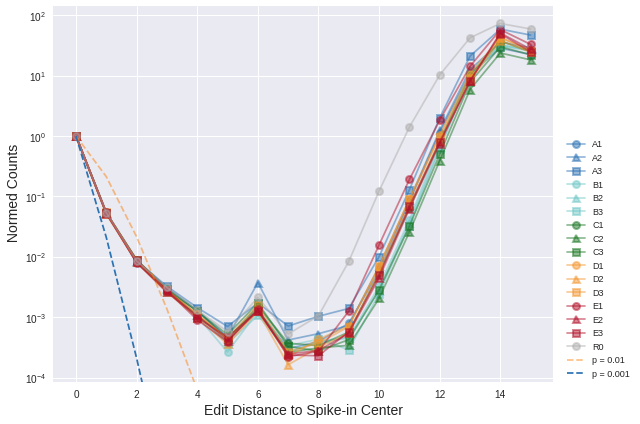

In [17]:
marker_map = {'0': 'o', '1': 'o', '2': '^', '3': 's'}
color_map = {'R': '#AEAEAE', 'A': '#2C73B4', 'B': '#70C7C7',
             'C': '#1C7725', 'D':'#F39730', 'E': '#B2112A'}

transform.spike_in_peak_plot(
    spike_in=byo_doped.spike_in,
    sample_list=byo_doped.sample_list.values,
    marker_list=[marker_map[sample[-1]] for sample in byo_doped.sample_list.values],
    color_list=[color_map[sample[0]] for sample in byo_doped.sample_list.values],
    err_guild_lines=[1e-2, 1e-3],
    figsize=[9, 6],
    legend_col=1,
    save_fig_to='/mnt/storage/projects/k-seq/output/2019-11-21_RU_figs/spike-in_peak.pdf'
)
plt.show()

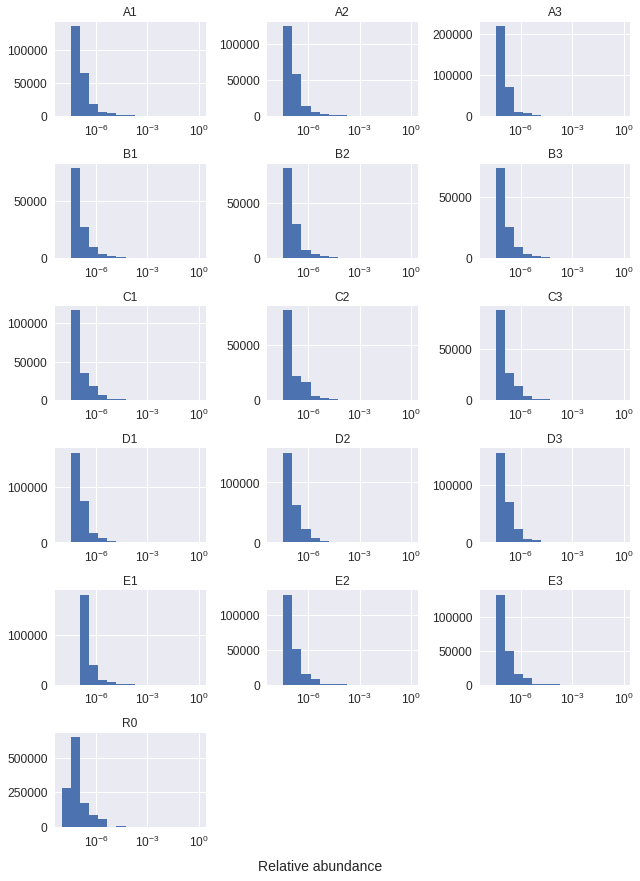

In [569]:
seq_table_vis.sample_rel_abun_hist(seq_table=byo_doped_table)

## Prefiltering: remove unrelated sequences
- Remove seqs within edit dist <= 4 to spike-in
- Remove seqs are not 21 nt long

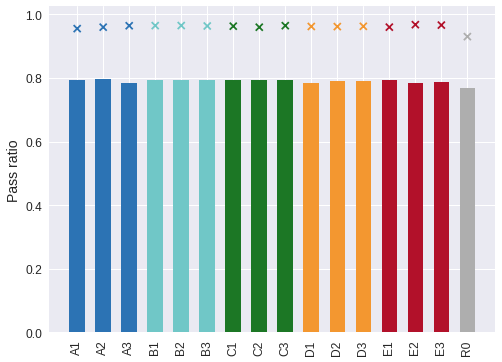

In [21]:
color_map = {'R': '#AEAEAE', 'A': '#2C73B4', 'B': '#70C7C7',
             'C': '#1C7725', 'D':'#F39730', 'E': '#B2112A'}
seq_table_vis.cross_table_compare(
    base_table=byo_doped.table, compare_table=byo_doped.table_filtered,
    samples=byo_doped.sample_list,
    color_map={sample: color_map[sample[0]] for sample in byo_doped.sample_list},
    figsize=[8, 6],
    save_fig_to='/mnt/storage/projects/k-seq/output/2019-11-21_RU_figs/pre-filter_pass-ratio.pdf'
)

/home/yuning/.pyenv/versions/anaconda3-5.0.1/envs/k-seq/lib/python3.7/site-packages/pandas/core/indexing.py:2418: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version
  result = result.to_dense()


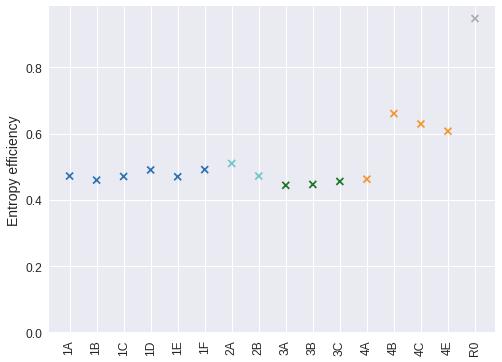

In [11]:
seq_table_vis.sample_entropy_scatterplot(
    byo_selected.table_smpl_filtered_seq_filtered, normalize=True,
    color_map={sample: color_map[sample[0]] for sample in byo_selected.sample_list},
    save_fig_to='/mnt/storage/projects/k-seq/output/2019-11-21_RU_figs/selected_pool_sample_entropy_efficienty.pdf',
    figsize=(8, 6)
)

## Pool distribution

In [33]:
byo_doped.table_filtered.to_csv('~/byo_doped_filter.csv')

In [32]:
byo_doped.table_filtered

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3,R0
CTACTTCAAACAATCGGTCTG,2073359,2223890,4673972,2375053,2925890,2602711,1509853,2060371,2188132,1894508,2005826,1712433,768138,1903080,1535263,1452168
CCACACTTCAAGCAATCGGTC,1918612,2063146,4473364,2005514,2398999,2190556,1125797,1509769,1555068,1362890,1470216,1155490,529124,1337152,1026848,1246770
ATTACCCTGGTCATCGAGTGA,1231995,1116392,2439960,1476384,1534694,1481682,2217682,1945364,2359447,3419619,3071206,3270499,1822663,4514332,4338722,1114058
AAGTTTGCTAATAGTCGCAAG,989320,852125,1917147,1065499,976044,901923,626570,582849,718972,746781,554123,516678,311240,420069,430141,1421715
GTACTTCAAACAATCGGTCTG,98231,93653,199970,99669,114584,100818,58189,75606,77390,71419,70333,55207,27347,59957,47546,85808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACTACCTTGGTTAGCCAGTGA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
GAGGTTGCTAATAGTTGCAAC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
AAGTCCGATAATCATCGCAGG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ACCACCCTGGACATAGAATGA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [6]:
input_pool = byo_doped.table_filtered.loc[:, byo_doped.table_filtered.columns.isin(byo_doped.grouper.input)]
reacted_pool = byo_doped.table_filtered.loc[:, ~byo_doped.table_filtered.columns.isin(byo_doped.grouper.input)]

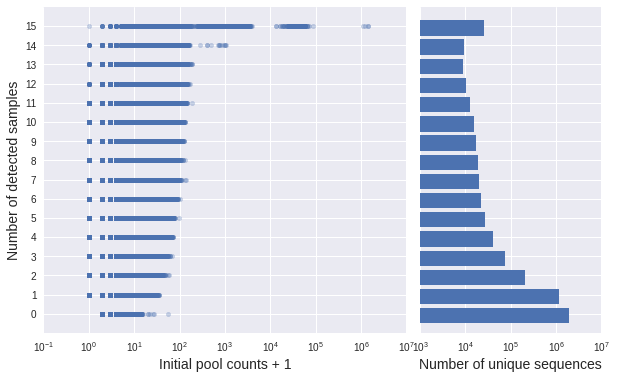

In [22]:
save_fig_to = None
save_fig_to = '/mnt/storage/projects/k-seq/output/2019-11-21_RU_figs/seq_detection_dist.jpeg'

fig, axes = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [2, 1]}, sharey=True)
fig.subplots_adjust(wspace=0.05, hspace=0.1)
occur = (reacted_pool > 0).sum(axis=1)

rel_abun = (input_pool.R0 + 1)

axes[0].scatter(rel_abun, occur, s=20, alpha=0.3)
axes[0].set_xlabel('Initial pool counts + 1', fontsize=14)
axes[0].set_ylabel('Number of detected samples', fontsize=14)
axes[0].set_xscale('log')
axes[0].set_xlim([0.1, 1e7])
axes[0].set_ylim([-1, 16])
axes[0].set_yticks(np.arange(16))
axes[0].set_yticklabels(np.arange(16))

bins = np.linspace(-0.5, 16.5, 18)
axes[1].hist(occur, bins=bins, height=0.8, orientation='horizontal')
axes[1].set_xlabel('Number of unique sequences', fontsize=14)
axes[1].set_xscale('log')
axes[1].set_xlim([1e3, 1e7])

if save_fig_to:
    fig.patch.set_alpha(0)
    fig.savefig(save_fig_to, bbox_inches='tight', dpi=300)

plt.show()

# Variance of measurements
### Reference free
Don't use spike-in or total DNA amount as absolute amount reference

In [440]:
byo_doped_table.seq_list = list(byo_doped_table.table.index[not_spike_in_filer & length_filter & non_singleton_filter])

## Replicate variance analysis
convert to pkg code for this
  - use grouper and target_table

In [8]:
from k_seq.data.seq_table import Grouper

grouper_info = {
    'input': ['R0'],
    'reacted': {'group': ['A1', 'A2', 'A3', 'B1', 'B2'], 'axis':1},
    'byo': {
        '1250': ['A1', 'A2', 'A3'],
        '250': ['B1', 'B2', 'B3']
    }
}

grouper = Grouper(groupers=grouper_info, target=byo_doped_table.table)

ImportError: cannot import name 'Grouper' from 'k_seq.data.seq_table' (/home/yuning/research/k-seq/src/pkg/k_seq/data/seq_table.py)

In [10]:
byo_table.grouper

In [447]:
byo_doped_table.table

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3,R0
AAAAAACTGGTAATCGTGCGA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AAAAAATTAAATAAATCGTTC,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
AAAAAATTCAAGCAATCGGTC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AAAAACAAAAACAAATAGCTC,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
AAAAACAAAAACAAATAGCTT,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTTTTGCTACTAGTCGCAAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
TTTTTTGCTAGTAGTCGCAAG,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
TTTTTTGCTCATAGTCGCAAG,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
TTTTTTGCTGATAGTCGCAAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [11]:
from k_seq.data.grouper import Grouper

byo_table.grouper = Grouper(groupers={'input': ['R0']}, target=byo_table.filtered_table)

byo_table.grouper.add({
    'byo':{1250:['A1', 'A2', 'A3'],
           250: ['B1', 'B2', 'B3'],
           50: ['C1', 'C2', 'C3'],
           10: ['D1', 'D2', 'D3'],
           2: ['E1', 'E2', 'E3']}}, target=byo_table.filtered_table
)

In [15]:
byo_table.grouper.byo.target

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3,R0
CTACTTCAAACAATCGGTCTG,2073359,2223890,4673972,2375053,2925890,2602711,1509853,2060371,2188132,1894508,2005826,1712433,768138,1903080,1535263,1452168
CCACACTTCAAGCAATCGGTC,1918612,2063146,4473364,2005514,2398999,2190556,1125797,1509769,1555068,1362890,1470216,1155490,529124,1337152,1026848,1246770
ATTACCCTGGTCATCGAGTGA,1231995,1116392,2439960,1476384,1534694,1481682,2217682,1945364,2359447,3419619,3071206,3270499,1822663,4514332,4338722,1114058
AAGTTTGCTAATAGTCGCAAG,989320,852125,1917147,1065499,976044,901923,626570,582849,718972,746781,554123,516678,311240,420069,430141,1421715
GTACTTCAAACAATCGGTCTG,98231,93653,199970,99669,114584,100818,58189,75606,77390,71419,70333,55207,27347,59957,47546,85808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACACGCCACACGCAATCGGTC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AACTCTGCGAATAATCGCAAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
ATTACTATGGTCGTCGAGTGC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
ATTGCCTTGGTCATCGACAGA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [66]:
# Relative abundance of filtered table



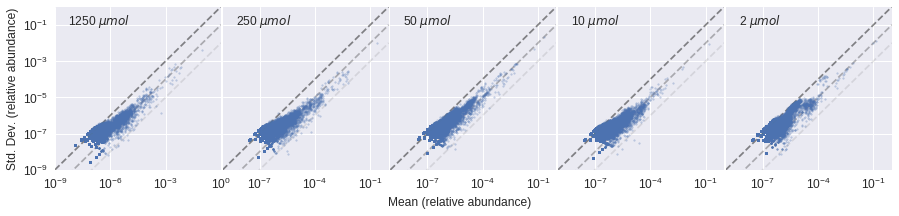

In [73]:
table = byo_doped.table_filtered
table = table / table.sum(axis=0)
seq_table.rep_variance_scatter(table=table, grouper=byo_doped.grouper.byo, merge=False, subsample=int(1e5),
                     xlim=(1e-9, 1), ylim=(1e-9, 1), xlog=True, ylog=True, group_title_pos=(5e-9, 0.5),
                     xlabel='Mean (relative abundance)', ylabel='Std. Dev. (relative abundance)',
                     save_fig_to='/mnt/storage/projects/k-seq/output/2019-11-21_RU_figs/seq_var_rel_abun.jpeg')

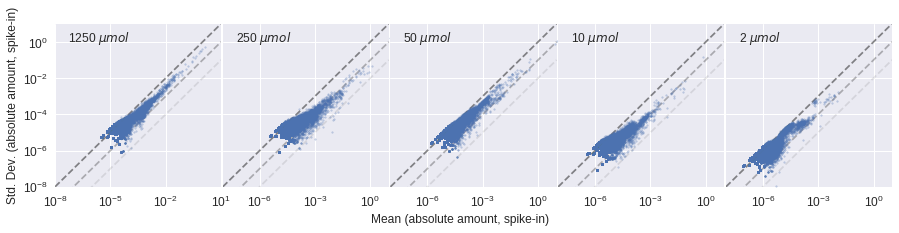

In [71]:
seq_table_vis.rep_variance_scatter(table=byo_doped.table_filtered_abs_amnt_spike_in,
                     grouper=byo_doped.grouper.byo, merge=False, subsample=int(1e5),
                     xlim=(1e-8, 10), ylim=(1e-8, 10), xlog=True, ylog=True, group_title_pos=(5e-8, 5),
                     xlabel='Mean (absolute amount, spike-in)', ylabel='Std. Dev. (absolute amount, spike-in)',
                     save_fig_to='/mnt/storage/projects/k-seq/output/2019-11-21_RU_figs/seq_var_abs_spike-in.jpeg')

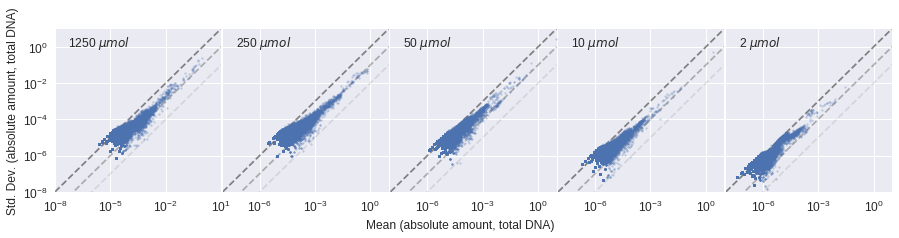

In [72]:
seq_table_vis.rep_variance_scatter(table=byo_doped.table_filtered_abs_amnt_total_dna,
                     grouper=byo_doped.grouper.byo, merge=False, subsample=int(1e5),
                     xlim=(1e-8, 10), ylim=(1e-8, 10), xlog=True, ylog=True, group_title_pos=(5e-8, 5),
                     xlabel='Mean (absolute amount, total DNA)', ylabel='Std. Dev. (absolute amount, total DNA)',
                     save_fig_to='/mnt/storage/projects/k-seq/output/2019-11-21_RU_figs/seq_var_abs_total_dna.jpeg')

In [41]:
byo_doped.table_filtered_abs_amnt_spike_in

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3,R0
CTACTTCAAACAATCGGTCTG,20.602660,28.161379,45.606846,28.811920,30.526673,28.873455,11.658106,9.856254,11.781506,2.321473,2.282200,2.253854,0.491679,0.489123,0.413661,76.185700
CCACACTTCAAGCAATCGGTC,19.064962,26.125859,43.649389,24.329019,25.029464,24.301169,8.692675,7.222324,8.372915,1.670045,1.672791,1.520822,0.338688,0.343670,0.276674,65.409818
ATTACCCTGGTCATCGAGTGA,12.242151,14.137002,23.808204,17.910109,16.011915,16.437199,17.123503,9.306092,12.703913,4.190299,3.494375,4.304534,1.166672,1.160258,1.169026,58.447293
AAGTTTGCTAATAGTCGCAAG,9.830726,10.790558,18.706793,12.925637,10.183355,10.005580,4.837967,2.788191,3.871144,0.915083,0.630473,0.680036,0.199222,0.107965,0.115897,74.588031
GTACTTCAAACAATCGGTCTG,0.976107,1.185939,1.951231,1.209091,1.195489,1.118435,0.449298,0.361679,0.416689,0.087515,0.080024,0.072662,0.017505,0.015410,0.012811,4.501781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACTACCTTGGTTAGCCAGTGA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000052
GAGGTTGCTAATAGTTGCAAC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000052
AAGTCCGATAATCATCGCAGG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000052
ACCACCCTGGACATAGAATGA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000052


In [21]:
byo_table.spike_in.apply(target=byo_table.filtered_table)

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3,R0
CTACTTCAAACAATCGGTCTG,20.602660,28.161379,45.606846,28.811920,30.526673,28.873455,11.658106,9.856254,11.781506,2.321473,2.282200,2.253854,0.491679,0.489123,0.413661,25.395233
CCACACTTCAAGCAATCGGTC,19.064962,26.125859,43.649389,24.329019,25.029464,24.301169,8.692675,7.222324,8.372915,1.670045,1.672791,1.520822,0.338688,0.343670,0.276674,21.803273
ATTACCCTGGTCATCGAGTGA,12.242151,14.137002,23.808204,17.910109,16.011915,16.437199,17.123503,9.306092,12.703913,4.190299,3.494375,4.304534,1.166672,1.160258,1.169026,19.482431
AAGTTTGCTAATAGTCGCAAG,9.830726,10.790558,18.706793,12.925637,10.183355,10.005580,4.837967,2.788191,3.871144,0.915083,0.630473,0.680036,0.199222,0.107965,0.115897,24.862677
GTACTTCAAACAATCGGTCTG,0.976107,1.185939,1.951231,1.209091,1.195489,1.118435,0.449298,0.361679,0.416689,0.087515,0.080024,0.072662,0.017505,0.015410,0.012811,1.500594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACACGCCACACGCAATCGGTC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000035
AACTCTGCGAATAATCGCAAG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000035
ATTACTATGGTCGTCGAGTGC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000035
ATTGCCTTGGTCATCGACAGA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000035


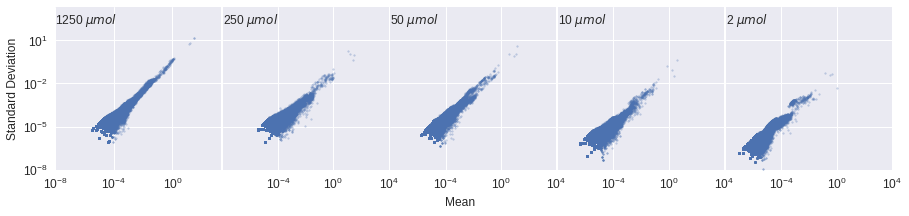

In [22]:
table_gen = byo_table.grouper.byo.get_table(target=byo_table.spike_in.apply(target=byo_table.filtered_table), remove_zero=True)

fig, axes = plt.subplots(1, 5, figsize=[15, 3], sharey=True)
fig.subplots_adjust(hspace=0, wspace=0.01)

for ix, ((key, table), ax) in enumerate(zip(table_gen, axes)):
    ax.scatter(table.mean(axis=1), table.std(axis=1), s=3, alpha=0.3)
    ax.text(s=f'{key:d} $\mu mol$', x=1e-8, y=1000, va='top', fontsize=12)
    ax.set_xscale('log')
    ax.set_xlim([1e-8, 2000])
    ax.set_yscale('log')
    ax.set_ylim([1e-8, 2000])
    ax.tick_params(axis='both', labelsize=12)
    if ix > 0:
        xticks = [tick for tick in ax.get_xticks()][2:-1]
        ax.set_xticks(xticks)
    else:
        ax.set_ylabel('Standard Deviation', fontsize=12)
    
fig.text(s='Mean', x=0.5, y=0, ha='center', va='top', fontsize=12)
plt.show()

In [560]:
byo_doped_table.table

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3,R0
AAAAAACTGGTAATCGTGCGA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AAAAAATTAAATAAATCGTTC,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
AAAAAATTCAAGCAATCGGTC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AAAAACAAAAACAAATAGCTC,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
AAAAACAAAAACAAATAGCTT,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTTTTGCTACTAGTCGCAAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
TTTTTTGCTAGTAGTCGCAAG,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
TTTTTTGCTCATAGTCGCAAG,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
TTTTTTGCTGATAGTCGCAAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


## Compare to mocked pool design

Convert to a doped_pool.py

In [25]:
from k_seq.data import landscape
reload(landscape)

pool_peaks = {
    'pk2': 'ATTACCCTGGTCATCGAGTGA',
    'pk1A': 'CTACTTCAAACAATCGGTCTG',
    'pk1B': 'CCACACTTCAAGCAATCGGTC',
    'pk3': 'AAGTTTGCTAATAGTCGCAAG'
}

pool_peaks = [landscape.Peaks(target=byo_doped, center_seq=seq, name=name, radius=5)
              for name, seq in pool_peaks.items()]

In [26]:
mega_peak = landscape.Peaks.from_peak_list(pool_peaks)

In [8]:
pool_peaks[0].peak_abun(max_radius=5)[['A1', 'A2', 'A3']]

,A1,A2,A3
0,0.096184,0.089109,0.091955
1,0.171135,0.154632,0.157799
2,0.199262,0.179027,0.181491
3,0.209968,0.188294,0.190260
4,0.213991,0.191814,0.193514
5,0.215317,0.192954,0.194560


In [35]:
def peak_abun_plot(peak, max_radius, rel_abun_table=None, sample_grouper=None, sample_plot_kwargs=None,
                   show_y_label=False, ax=None, save_fig_to=None):
    peak_abun_info = peak.peak_abun(max_radius=max_radius,
                                        rel_abun_table=rel_abun_table)
    
    if sample_grouper is not None:
        peak_abun_info = pd.DataFrame.from_dict(
            {x_val: peak_abun_info[group].mean(axis=1)
             for x_val, group in sample_grouper.items()},
            orient='columns'
        )
        
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=[8, 6])
    if sample_plot_kwargs is None:
        from k_seq.utility.plot_tools import PlotPreset
        colors = PlotPreset.colors(num=len(peak_abun_info.columns))
        markers = PlotPreset.markers(num=len(peak_abun_info.columns), with_line=False)
        sample_plot_kwargs = {
            sample: {'color': color,
                     'marker': marker}
            for sample, color, marker in zip(peak_abun_info.columns, colors, markers)
        }
    loc = np.arange(0, max_radius + 1)
    for sample in peak_abun_info.columns:
        ax.plot(loc, peak_abun_info[sample], ls='-', markeredgewidth=2, **sample_plot_kwargs[sample], label=sample)
    
    if show_y_label:
        ax.set_ylabel('Relative abundance', fontsize=14)
    ax.tick_params(labelsize=12)
    ax.text(s=peak.name, x=0, y=ax.get_ylim()[1] * 0.9, fontsize=14, color='#151515')
    
    if save_fig_to:
        fig.savefig(save_fig_to, bbox_inches='tight', dpi=300)

In [30]:
sample_plot_kwargs = {
    'R0': {'color': '#AEAEAE', 'marker': '*'}
}

color_list = ['#2C73B4', '#70C7C7', '#1C7725', '#F39730', '#B2112A']
marker_list = ['o', '+', '^']

for byo, color in zip(['A', 'B', 'C', 'D', 'E'], color_list):
    for rep, marker in zip(['1', '2', '3'], marker_list):
        sample_plot_kwargs[byo + rep] = {'color': color, 'marker': marker}
        
peak_abun_plot(peak=pool_peaks[0], max_radius=5, sample_plot_kwargs=sample_plot_kwargs, rel_abun_table=byo_table.filtered_rel_abun)

NameError: name 'byo_table' is not defined

/home/yuning/research/k-seq/src/pkg/k_seq/data/landscape.py:57: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return rel_abun_table.loc[seqs].sum(axis=0)


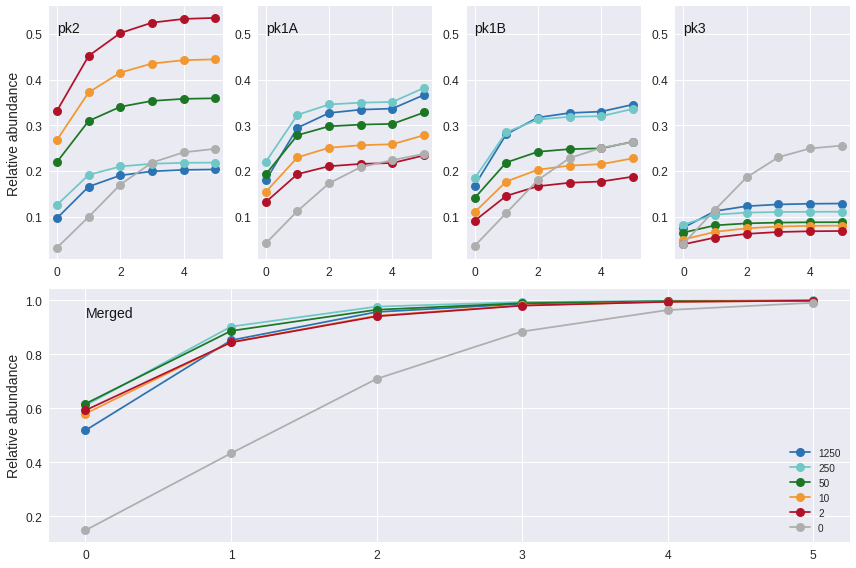

In [36]:
save_fig_to = '/mnt/storage/projects/k-seq/output/2019-11-21_RU_figs/peaks_change.pdf'

fig = plt.figure(figsize=[12, 8], constrained_layout=False)
gs = fig.add_gridspec(2, 4)

sample_grouper = {
    1250: ['A1', 'A2', 'A3'],
    250: ['B1', 'B2', 'B3'],
    50: ['C1', 'C2', 'C3'],
    10: ['D1', 'D2', 'D3'],
    2: ['E1', 'E2', 'E3'],
    0: ['R0']
}

axes = [fig.add_subplot(gs[0, 0])]
axes += [
    fig.add_subplot(gs[0, 1], sharey=axes[0]),
    fig.add_subplot(gs[0, 2], sharey=axes[0]),
    fig.add_subplot(gs[0, 3], sharey=axes[0]),
    fig.add_subplot(gs[1, :])
]


sample_plot_kwargs = {
    1250: {'color': '#2C73B4', 'marker': 'o', 'alpha': 1},
    250: {'color': '#70C7C7', 'marker': 'o', 'alpha': 1},
    50: {'color': '#1C7725', 'marker': 'o', 'alpha': 1},
    10: {'color': '#F39730', 'marker': 'o', 'alpha': 1},
    2: {'color': '#B2112A', 'marker': 'o', 'alpha': 1},
    0: {'color': '#AEAEAE', 'marker': 'o', 'alpha': 1},
}
        
peak_list = pool_peaks + [landscape.Peaks.from_peak_list(pool_peaks)]
peak_list[-1].name = 'Merged'

for peak, ax in zip(peak_list, axes):
    peak_abun_plot(peak=peak, max_radius=5, sample_grouper=sample_grouper,
                   sample_plot_kwargs=sample_plot_kwargs, show_y_label=True if ax in [axes[0], axes[-1]] else False,
                   rel_abun_table=byo_doped.table_filtered/byo_doped.table_filtered.sum(axis=0), ax=ax)
axes[-1].legend(loc='lower right')
plt.tight_layout()

if save_fig_to:
    fig.patch.set_alpha(0)
    fig.savefig(save_fig_to, bbox_inches='tight', dpi=300)

plt.show()

In [178]:
def peak_abun_kin_plot(peak, max_radius, sample_grouper, rel_abun_table=None, sample_plot_kwargs=None, ax=None, save_fig_to=None):
    peak_abun_info = peak.peak_abun(max_radius=max_radius,
                                    rel_abun_table=rel_abun_table)
    
    peak_abun_kin_info = pd.DataFrame.from_dict(
        {x_val: peak_abun_info[group].mean(axis=1)
         for x_val, group in sample_grouper.items()},
        orient='index'
    )
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=[8, 6])
        
    if sample_plot_kwargs is None:
        from k_seq.utility.plot_tools import PlotPreset
        colors = PlotPreset.colors(num=len(peak_abun_kin_info.columns))
        markers = PlotPreset.markers(num=len(peak_abun_kin_info.columns), with_line=False)
        sample_plot_kwargs = {
            sample: {'color': color,
                     'marker': marker}
            for sample, color, marker in zip(peak_abun_kin_info.columns, colors, markers)
        }
        
    loc = peak_abun_kin_info.index
    
    for dist in peak_abun_kin_info.columns:
        ax.plot(loc, peak_abun_kin_info[dist], ls='-', markeredgewidth=2, **sample_plot_kwargs[dist], label=f'dist = {dist}')
        
    ax.set_ylabel('Relative abundance', fontsize=14)
    ax.set_xlabel('BYO concentration', fontsize=14)
    ax.tick_params(labelsize=12)
    ylims = ax.get_ylim()
    ax.set_ylim([ylims[0], ylims[1] * 1.2])
    ax.text(s=peak.name, x=0, y=ylims[1] * 1.1, fontsize=18, color='#151515')
    
    if save_fig_to:
        fig.savefig(save_fig_to, bbox_inches='tight', dpi=300)

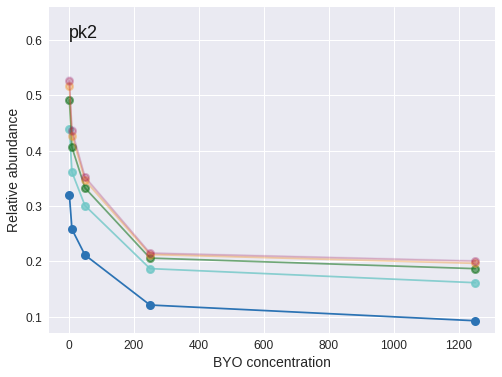

In [179]:
peak_abun_kin_plot(peak_list[0], max_radius=5, sample_grouper=sample_grouper, sample_plot_kwargs=sample_plot_kwargs)

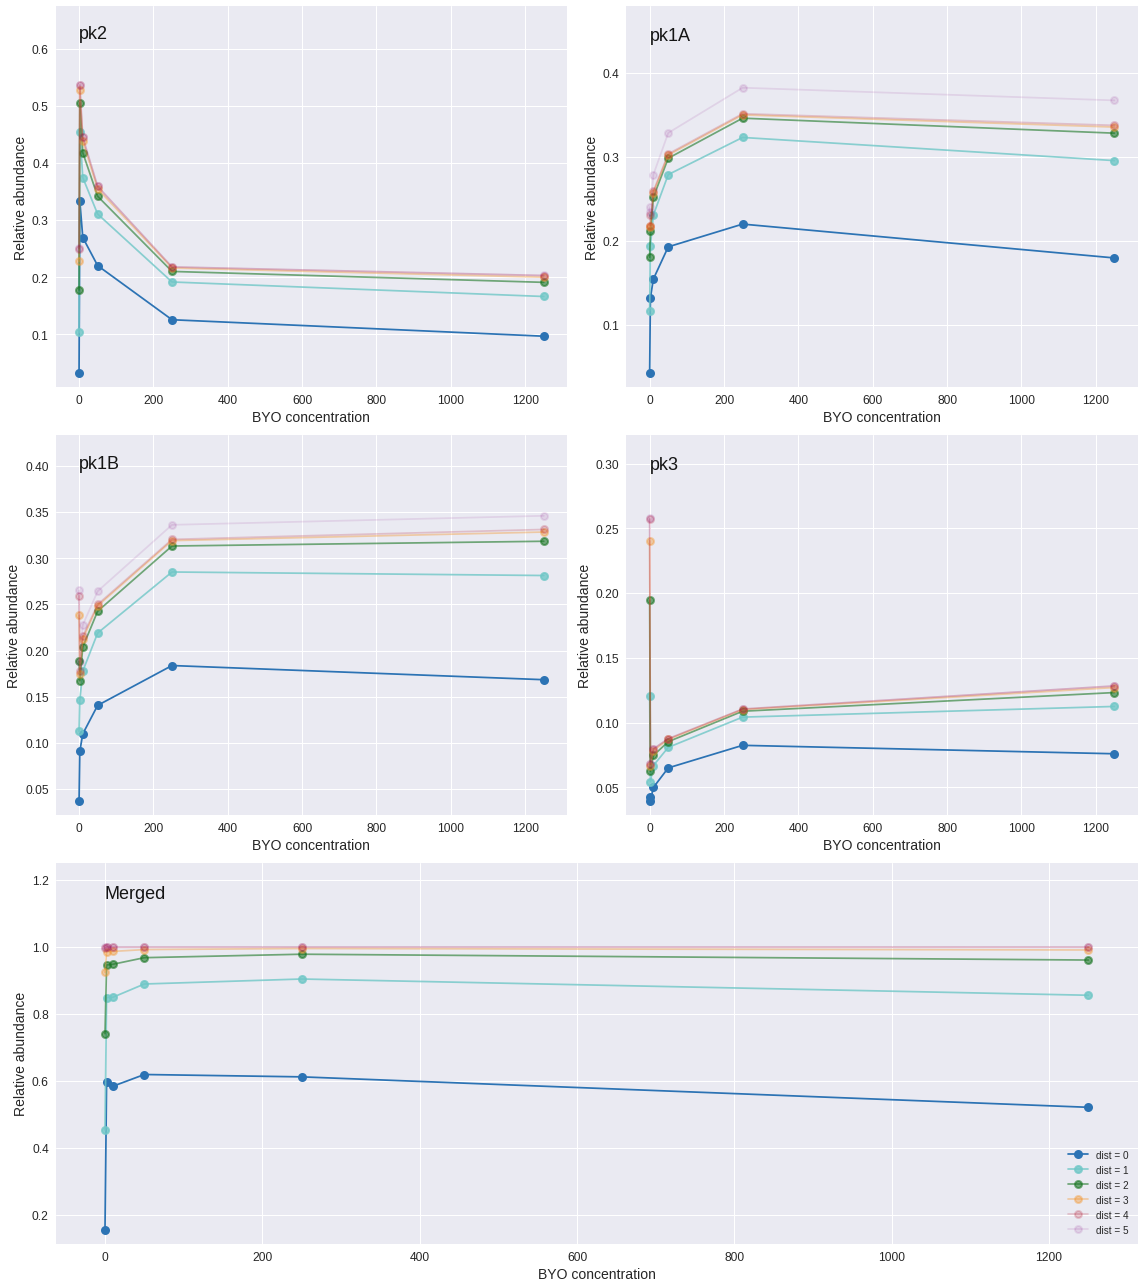

In [185]:
sample_grouper = {
    1250: ['A1', 'A2', 'A3'],
    250: ['B1', 'B2', 'B3'],
    50: ['C1', 'C2', 'C3'],
    10: ['D1', 'D2', 'D3'],
    2: ['E1', 'E2', 'E3'],
    0: ['R0']
}

sample_plot_kwargs = {
    0: {'color': '#2C73B4', 'marker': 'o', 'alpha': 1},
    1: {'color': '#70C7C7', 'marker': 'o', 'alpha': 0.8},
    2: {'color': '#1C7725', 'marker': 'o', 'alpha': 0.6},
    3: {'color': '#F39730', 'marker': 'o', 'alpha': 0.4},
    4: {'color': '#B2112A', 'marker': 'o', 'alpha': 0.2},
    5: {'color': '#810080', 'marker': 'o', 'alpha': 0.1},
}

fig = plt.figure(figsize=[16, 18], constrained_layout=False)
gs = fig.add_gridspec(3, 2)
axes = [
    fig.add_subplot(gs[0, 0]),
    fig.add_subplot(gs[0, 1]),
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1]),
    fig.add_subplot(gs[2, :])
]
        
peak_list = pool_peaks + [landscape.Peaks.from_peak_list(pool_peaks)]
peak_list[-1].name = 'Merged'

for peak, ax in zip(peak_list, axes):
    peak_abun_kin_plot(peak=peak, max_radius=5,
                       sample_grouper=sample_grouper,
                       sample_plot_kwargs=sample_plot_kwargs,
                       rel_abun_table=byo_table.filtered_rel_abun, ax=ax)
axes[-1].legend()
plt.tight_layout()
plt.show()

In [343]:
func_tools.dict_flatten(pd.DataFrame(data=[[0, 1], [3, 1]], index=['ix1', 'ix2'], columns=['col1', 'col2']).to_dict())

{'col1_ix1': 0, 'col1_ix2': 3, 'col2_ix1': 1, 'col2_ix2': 1}

In [308]:
test_series = pd.Series(data=[0, 1, 2, 3, 4], index=[0, 1, 2, 3, 4])

In [347]:
np.full(fill_value=np.nan, shape=(2))

array([nan, nan])

# Parameter estimation
## Classic fitting using spike-in to normalized and fit into kinetic modelindividually

In [178]:
seq_test = byo_doped.reacted_frac_filtered.index.values[-1000:-1]
print(seq_test)

['CCTCACTTCAATCAATCCGTG' 'AATACCCTGGTCTTGGAGCGA' 'AGGTTTTCTAATACTCGCATG'
 'CCACACTTAAAGCACTTCGTC' 'TCACTCCAAAGAATCGGTCTG' 'ATTATTCTTGTAATCGGGTGA'
 'CCAAACTACGAGCAATCGTTC' 'ATTGCCCTAGTCACCGAGTGG' 'AAGTTTGCCTAGAGTCGCTAG'
 'CGACTTCAAACAATCGGCAAG' 'AAGTTTTCTACTATTCGCACG' 'AAGCATGGTAATAGACGCAAG'
 'AAGCTTAGTAATAGTGGCAAG' 'ATTACCCCCGTTATCGAGTGC' 'ATTTCTCTTGTAATCAAGTGA'
 'ACTACCACGGGCATCGAGTGA' 'CCACGCTTGAATTAATCGGTC' 'ATAACCCTGGCCATGGTGTGA'
 'AAGTGTGCTGATAGACGCAAT' 'CTACTTCCAACAACAGGTCAG' 'ATTTGCCTGGTTATCTAGTGG'
 'AAGTTTGTCAATAGTGGCATG' 'ATTAGCACGGTCATCGGGTGA' 'TCTCAGGTCTAGCAATCGGTC'
 'CTACTTCGAACAGTCGATCTC' 'ATTACCTTGGTTTTGGAGTGA' 'ATAACACTGCTCATCAAGTGA'
 'CTAGACTTCAAGCAGGCGGTC' 'AAAGCCCTGGTCATTGAGTGA' 'GTAATTCAAACACTCGGTGTG'
 'ATTACCCTTGTTATAGACTGA' 'ACGCTTGCTATGAGTCGCATG' 'CCTCACATGAAGCATTCGGTC'
 'CCAGACTTCACAGAATCGGTC' 'CTACTTCAATCACTCGGGGTG' 'CTACGCTTCAAGAAATCAGTC'
 'CCAGACTTCAGGCAACCGGTA' 'CCACACTCCAAGTAATGGGAC' 'AGTACCCTGGTCTGCGAGTTA'
 'CGAATTCCAACAACCGGTCTG' 'AAGCTTGCAAATAATGGCAAG' 'A

limit_output extension: Maximum message size of 10000 exceeded with 24310 characters

In [89]:
from k_seq.estimator import least_square
from k_seq.model import kinetic
reload(kinetic)
reload(least_square)
reload(func_tools)

single_fitter = least_square.SingleFitter.from_table(
    table=byo_doped.reacted_frac_filtered,
    seq=seq_test[0],
    model=kinetic.BYOModel.func_react_frac_no_slope,
    x_data=byo_doped.x_values,
    bootstrap_num=100,
    bs_method='stratified',
    metrics={'kA':lambda params: params[0] * params[1]},
    grouper=byo_doped.grouper.byo.group
)

In [43]:
%timeit single_fitter.fit()

36.4 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [47]:
%timeit single_fitter.fit()

483 ms ± 9.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
%timeit single_fitter.fit()

4.01 s ± 52.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [90]:
single_fitter.fit()

In [40]:
40.3 * byo_doped.reacted_frac_filtered.shape[0] / 3600 / 24 / 40

10.90587265625

In [91]:
single_fitter.results.to_series()

k           209.580016
A             0.419281
kA           87.872850
k_mean      209.476407
k_std        59.199596
k_2.5%      101.997716
k_50%       209.939408
k_97.5%     308.472979
A_mean        0.430003
A_std         0.067893
A_2.5%        0.327113
A_50%         0.419257
A_97.5%       0.597296
kA_mean      86.200868
kA_std       12.454793
kA_2.5%      60.871445
kA_50%       87.914071
kA_97.5%    105.208670
Name: CTACTTCAAACAATCGGTCTG, dtype: float64

In [71]:
single_fitter.results.to_series()

k           209.581331
A             0.419280
kA           87.873309
k_mean      211.563051
k_std        49.485723
k_2.5%      108.653713
k_50%       214.546126
k_97.5%     299.581954
A_mean        0.387102
A_std         0.039399
A_2.5%        0.340258
A_50%         0.376575
A_97.5%       0.481871
kA_mean      80.461452
kA_std       14.906638
kA_2.5%      53.136396
kA_50%       80.863022
kA_97.5%    108.478630
Name: CTACTTCAAACAATCGGTCTG, dtype: float64

In [193]:
reload(least_square)
batch_fitter = least_square.BatchFitter(table=byo_doped.reacted_frac_filtered, x_values=byo_doped.x_values, model=kinetic.BYOModel.func_react_frac_no_slope, seq_to_fit=seq_test, bootstrap_num=0)

In [194]:
batch_fitter.fit(deduplicate=True, parallel_cores=10)

Shrink rows in table by removing duplicates: 999 -->8
Recovering original table...


In [195]:
batch_fitter.summary(save_to='some.csv')

byo-doped-pool.ipynb  individual_fitting.ipynb	      test.pkl
data_property.ipynb   model_test.ipynb
evan_bfo.ipynb	      seq_err_correction_dada2.ipynb


In [168]:
(3 * 60 + 17) * 20 / 60

65.66666666666667

In [22]:
byo_doped.table.loc[['TAACGTTTCAAGCAATCGGTC', 'CCTGCCTTCAACCAATCGGTC', 'ATAATTCATTCAATCGTTCTT']]

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3,R0
TAACGTTTCAAGCAATCGGTC,6,3,4,1,2,0,1,2,0,2,2,1,0,0,0,0
CCTGCCTTCAACCAATCGGTC,6,1,3,2,4,2,2,2,1,3,4,0,0,1,3,0
ATAATTCATTCAATCGTTCTT,7,1,3,3,2,1,1,1,1,1,0,0,0,3,2,0


In [52]:
byo_doped.filtered_table

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3,R0
seq,,,,,,,,,,,,,,,,
CTACTTCAAACAATCGGTCTG,2073359,2223890,4673972,2375053,2925890,2602711,1509853,2060371,2188132,1894508,2005826,1712433,768138,1903080,1535263,1452168
CCACACTTCAAGCAATCGGTC,1918612,2063146,4473364,2005514,2398999,2190556,1125797,1509769,1555068,1362890,1470216,1155490,529124,1337152,1026848,1246770
ATTACCCTGGTCATCGAGTGA,1231995,1116392,2439960,1476384,1534694,1481682,2217682,1945364,2359447,3419619,3071206,3270499,1822663,4514332,4338722,1114058
AAGTTTGCTAATAGTCGCAAG,989320,852125,1917147,1065499,976044,901923,626570,582849,718972,746781,554123,516678,311240,420069,430141,1421715
GTACTTCAAACAATCGGTCTG,98231,93653,199970,99669,114584,100818,58189,75606,77390,71419,70333,55207,27347,59957,47546,85808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACACGCCACACGCAATCGGTC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AACTCTGCGAATAATCGCAAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
ATTACTATGGTCGTCGAGTGC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [49]:
X = pd.DataFrame({'c': byo_doped.x_values, 'n':N}).transpose()

In [51]:
X.to_csv('/mnt/storage/projects/k-seq/datasets/count_tests/byo_doped/X.csv')